# Simple Linear Regression- Minimal example

### Import relevant libraries 

In [1]:
import numpy as np ## mathmatical operations
import matplotlib.pyplot as plt ## for nice graphs
from mpl_toolkits.mplot3d import Axes3D ## create 3d graphs


### Generate random input data to train on 

In [2]:
## outputs will change but model will stay the same
# forumla for model is genreally y = xw + b 
## x = input variables, w = weights , b = bias or coefficients in non-machine learning terms. 
## Bias is based on inputs and outputs. It is a constant added to output of inputs and weights to offset the result
## weights are a coefficent for input. higher weight = more important the input is 

In [3]:
observations = 1000 ## amount of observations affect speed of algorithm
# size = number of observations(n) x number of variables(k)
xs = np.random.uniform(low = -10, high = 10, size = (observations,1))
zs = np.random.uniform(low = -10, high = 10, size = (observations,1))
## inputs matrix = n x k, or 1000 x 2
inputs = np.column_stack((xs,zs))
print(inputs.shape)

(1000, 2)


### Create the targets we will aim at

In [4]:
## then create a function containing targets, 
## e.g. f(x,z) = 2(weight1)* x - 3(weight2)*z + 5(bias) + noise (real data always contains noise, never perfect)

In [5]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


### Plot the training data- the point is to see that there is a strong trend that our model should learn to reproduce

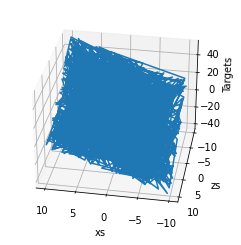

In [6]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
xs = xs.reshape(observations,)
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)
xs = xs.reshape(observations,1)

### Initialise variables

In [7]:
init_range = 0.1
## range of weights we will choose from, ranging from positive 0.1 to -0.1
weights = np.random.uniform(-init_range,init_range,size = (2,1)) ## 2 columns with one row
biases = np.random.uniform(-init_range,init_range,size = 1) 
# in machine learning, there are as many biases as outputs, each bias refers to an output
                            
print(weights) ## first two values
print(biases)

[[-0.05548719]
 [ 0.06196034]]
[0.08406603]


### Set a learning rate

In [8]:
learning_rate = 0.02

### Train the model

In [9]:
## since iterative process, we need a loop to apply update rule and calculate the loss function
## for each iteration we calculate outputs, compare outputs to targets through loss function, 
## print the loss to see how we do, and adjust the weights and biases if needed 
## as weights and biases adjusted, procedure starts from beginning 

In [10]:
for i in range(100): # outputs given based on linear model equation( see notes on that)
    outputs = np.dot(inputs,weights)+ biases ## bias added to each output of matrix, as we are going to multiply matrices
    ## will be 1000 x 1 for in, 1000 by 2 for out, by 2 x 1 matrix, meaning output will be 1000 by 1,
    ## biases will be scaler value
    deltas = outputs -  targets ## records difference between ouputs and targets, and how far away the output is from target
    ## deltas is 1000 by 1 matrix
    ## for loss function we are interested in sum of deltas squared for l2-norm loss 
    loss = np.sum(deltas** 2) / 2 / observations
    ## loss functions compared outputs to targets 
    ## need to divide by 2 for elegant update rules for gradient descent, then dividing by observations calculates the mean loss
    ## dividing by 2 or a constant doesn't change loss functiion,
    ## still follows logic that it will be lower for higher accuracy 
    ## means doesn't matter about number of observations, instead of adjusting the learning rate, we adjust the loss 
    print(loss)
    ## to check if loss is decreasing, if so, algorithm working
    
    deltas_scaled = deltas/observations
    ## scales the delta based on number of observations 
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    ## algebraically dot product means sum of products 
    ## shape is 2 by 1, 2 by 1, scaler, 1000 by 2, 1000 by 1, may not be able to multiply inputs based on different shape,
    ## so need to transpose it, 1000 by 2 becomes 2 by 1000, so compatible 
    biases = biases - learning_rate * np.sum(deltas_scaled)
    ## weights and biases updated based on gradient descent methodology 

245.77134679427783
36.81161236025625
13.82146012844433
10.953850261462344
10.276967941034197
9.85140378502025
9.466890329119357
9.100145133555307
8.748125691075531
8.409998777133724
8.085189932579675
7.77317175558635
7.473440255263165
7.185511572728354
6.908920933400001
6.643221867915016
6.38798548832298
6.142799795443152
5.907269013784299
5.681012952685207
5.463666392615509
5.254878495643147
5.054312239116407
4.861643871646461
4.676562390512141
4.4987690396434905
4.32797682737369
4.163910063180898
4.006303912672284
3.8549039700918657
3.7094658476621145
3.5697547810964387
3.4355452506458137
3.3066206170677646
3.1827727719302055
3.0638018016855475
2.9495156649729237
2.839729882627562
2.73426723989697
2.6329575003832297
2.5356371312496733
2.442149039248339
2.3523423171421376
2.2660720001124015
2.183198831758591
2.1035890393124594
2.0271141177038365
1.9536506221294394
1.8830799687899122
1.8152882434734374
1.7501660176769214
1.6876081719679574
1.6275137263024357
1.5697856770238965
1.514330

In [11]:
## loss decreases, so can see we have minimised loss function in respect to weights and biases, 
## so have found a linear function that fits model well
## in the memory of the computer, the variables weights, and biases and outputs contain the optimised values
## from last iteration  of loop

### Print weights and biases to see if we worked correctly

In [12]:
## make sure the algorithm calculated the function and model correctly 

In [13]:
print(weights,biases) ## weight close to 2 as desired, same for first bias, 
## but second bias is close to 5 but not really, due to too few iterations or an inapproriate learning rate 
## re run the code to try again for another 100 iterations 
## play around with the code to try different no of observations, learning rate, number of iterations, 
## initial range for initialising weights and biases

[[ 2.01309855]
 [-3.00137482]] [4.34131132]


### Plot last outputs vs targets

Since they are the last ones at the end of the traning, they represent the model's accuracy. The closer this plot is to a 45 degree line, the closer target and output values are.

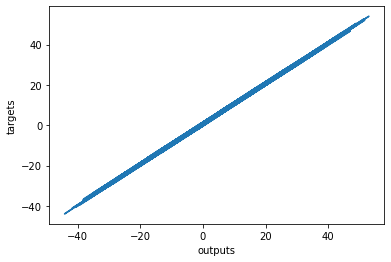

In [14]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [15]:
## closer the graph is to 45 degree line, closer outputs are to targets 